# Importing Libraries

In [5]:
#Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime

File path

In [6]:
tr_path = "./prosperLoanData.csv"

# Preprocessing and Data Analysis

First look at the data

In [7]:
# Loading the prosperLoanData dataset.
df=pd.read_csv(tr_path)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
# Size of each data set:

print(f"training set (row, col): {df.shape}") # \n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (113937, 81)


Preprocessing of the training data

In [6]:
#column information
df.info(verbose=True, null_counts=True)

C:\Users\Cristal info\AppData\Local\Temp\ipykernel_21620\2751117562.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#summary statistics test
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Removing duplicate data 

The following columns are unique identifiers they are not useful for the model.

In [8]:
df[["ListingKey","ListingNumber","LoanKey","LoanNumber","MemberKey"]]

,ListingKey,ListingNumber,LoanKey,LoanNumber,MemberKey
0,1021339766868145413AB3B,193129,E33A3400205839220442E84,19141,1F3E3376408759268057EDA
1,10273602499503308B223C1,1209647,9E3B37071505919926B1D82,134815,1D13370546739025387B2F4
2,0EE9337825851032864889A,81716,6954337960046817851BCB2,6466,5F7033715035555618FA612
3,0EF5356002482715299901A,658116,A0393664465886295619C51,77296,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,909464,A180369302188889200689E,102670,36CE356043264555721F06C
...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,9BD7367919051593140DB62,88485,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,537216,62D93634569816897D5A276,55801,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,1069178,DD1A370200396006300ACA0,123122,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,539056,589536350469116027ED11B,56401,A33834861822272782621C8


In [9]:
# Identify the duplicate data
print(df['ListingKey'].nunique())
print(df['ListingNumber'].nunique())
print(df['LoanKey'].nunique())
print(df['LoanNumber'].nunique())
print(df['MemberKey'].nunique())

113066
113066
113066
113066
90831


It is clear that there are duplicate data in Memberkey column so we will drop it.

In [10]:
 #Remove duplicate data 
df.drop_duplicates(subset = 'ListingKey', inplace = True)
df.drop_duplicates(subset = 'ListingNumber', inplace = True)
df.drop_duplicates(subset = 'LoanKey', inplace = True)
df.drop_duplicates(subset = 'LoanNumber', inplace = True)
df.drop_duplicates(subset = 'MemberKey', inplace = True)

In [11]:
df.shape

(90831, 81)

## Missing values 🚫

It refers to the absence of a particular value or observation in a dataset

There are many ways data can end up with missing values. For example:
1. The product wasn't weighed.
2. The data provider didn't include the outlet size of some products.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.                                                                                        

In [12]:
# Calculate the number of missing values in each column 
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
CreditGrade 67003
Term 0
LoanStatus 0
ClosedDate 49801
BorrowerAPR 20
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 23895
EstimatedLoss 23895
EstimatedReturn 23895
ProsperRating (numeric) 23895
ProsperRating (Alpha) 23895
ProsperScore 23895
ListingCategory (numeric) 0
BorrowerState 4360
Occupation 3190
EmploymentStatus 1927
EmploymentStatusDuration 6604
IsBorrowerHomeowner 0
CurrentlyInGroup 0
GroupKey 80587
DateCreditPulled 0
CreditScoreRangeLower 510
CreditScoreRangeUpper 510
FirstRecordedCreditLine 606
CurrentCreditLines 6590
OpenCreditLines 6590
TotalCreditLinespast7years 606
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 606
TotalInquiries 996
CurrentDelinquencies 606
AmountDelinquent 6606
DelinquenciesLast7Years 854
PublicRecordsLast10Years 606
PublicRecordsLast12Months 6590
RevolvingCreditBalance 6590
BankcardUtilization 6590
AvailableBankcardCredit 6541
TotalTrades 6541
TradesNeverDelinquent (

In [13]:
#missing values in decsending order
print("Train:\n")
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100,"\n\n")
# print("Test:\n")
# print(te_df.isnull().sum().sort_values(ascending=False),"\n\n",te_df.isnull().sum()/te_df.shape[0] *100,"\n\n")

Train:

ScorexChangeAtTimeOfListing    83521
OnTimeProsperPayments          82251
TotalProsperLoans              82251
ProsperPrincipalOutstanding    82251
ProsperPrincipalBorrowed       82251
                               ...  
IncomeRange                        0
IncomeVerifiable                   0
StatedMonthlyIncome                0
LoanKey                            0
Investors                          0
Length: 81, dtype: int64 

 ListingKey                      0.000000
ListingNumber                   0.000000
ListingCreationDate             0.000000
CreditGrade                    73.766666
Term                            0.000000
                                 ...    
PercentFunded                   0.000000
Recommendations                 0.000000
InvestmentFromFriendsCount      0.000000
InvestmentFromFriendsAmount     0.000000
Investors                       0.000000
Length: 81, dtype: float64 




Observation: The number of observations (rows) in the dataset is 90831 after dropping the duplicate data, and according to the number of missing values reported above
we can refer to remove the columns with more than 50,000 missing values.

In [14]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts >= 49801].sort_values(ascending=False)
print(null_counts)

ScorexChangeAtTimeOfListing            83521
TotalProsperLoans                      82251
TotalProsperPaymentsBilled             82251
OnTimeProsperPayments                  82251
ProsperPaymentsLessThanOneMonthLate    82251
ProsperPaymentsOneMonthPlusLate        82251
ProsperPrincipalBorrowed               82251
ProsperPrincipalOutstanding            82251
GroupKey                               80587
LoanFirstDefaultedCycleNumber          75779
CreditGrade                            67003
ClosedDate                             49801
dtype: int64


Observation: Exception for CreditGrade and ClosedDate columns, we will not remove them because are important features for the model. 

In [15]:
#The attributes which are not useful for project.
col=["GroupKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments","ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate",
     "ProsperPrincipalBorrowed","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","ListingKey","ListingNumber","LoanKey",
     "LoanNumber","MemberKey","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)","ProsperRating (Alpha)","InvestmentFromFriendsCount",
     "Recommendations" , "LP_NonPrincipalRecoverypayments", "LP_NetPrincipalLoss", "LP_GrossPrincipalLoss","LP_CollectionFees","PercentFunded","LP_ServiceFees","LP_InterestandFees",
     "LP_CustomerPrincipalPayments","LP_CustomerPayments","InvestmentFromFriendsAmount","PublicRecordsLast10Years","PublicRecordsLast12Months"]


In [16]:
print("The number of columns proposed for removal: ", len(col))  

The number of columns proposed for removal:  34


In [17]:
# Drop the columns list.
for i in col :
  df=df.drop([i], axis='columns')

In [18]:
#After removing columns list we will check the shape of dataset.
df.shape

(90831, 47)

Handling missing data

There many techniques to deal with missing data, including Iterative Imputer, KNN. 
- Iterative Imputer: it is a machine learning technique that consists of the process of remplacing missing values in a dataset with estimates based on the available data.

There are several approaches to data imputation, including:

  Mean or median imputation: Replace missing values with the mean or median value of the observed data in the same column.

  Mode imputation: Replace missing values with the mode (most common value) of the observed data in the same column.

  Regression imputation: Use a regression model to estimate the missing values based on the observed data in other columns.

  Multiple imputation: Generate multiple imputed datasets by filling in missing values with random draws from a distribution based on the observed data. This approach can help to account for the uncertainty in the imputed values and can improve the accuracy of downstream analyses.
                                                          
The iterative imputer is a popular method for missing data imputation because it can handle missing data that is non-random and can capture the complex relationships between variables.

In [19]:
# filling the float values with  iterative imputer by mean
df_cat_col = df.select_dtypes(include=('float')).columns
df_cat_col
for B in df_cat_col:
  imputer = IterativeImputer(max_iter=10, random_state=0)
  imputer = imputer.fit(df[[B]])
  df[B] = imputer.transform(df[[B]])

In [20]:
# filling the object values with  iterative imputer by most_frequent
df_cat_col = df.select_dtypes(include=('object'),exclude=()).columns
df_cat_col = df_cat_col.drop('ClosedDate')
df_cat_col = df_cat_col.drop('LoanStatus')
for B in df_cat_col:
  imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
  imputer = imputer.fit(df[[B]])
  df[B] = imputer.transform(df[[B]])

In [21]:
# check the attributes if the all null values are changed or not
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingCreationDate 0
CreditGrade 0
Term 0
LoanStatus 0
ClosedDate 49801
BorrowerAPR 0
BorrowerRate 0
LenderYield 0
ProsperScore 0
ListingCategory (numeric) 0
BorrowerState 0
Occupation 0
EmploymentStatus 0
EmploymentStatusDuration 0
IsBorrowerHomeowner 0
CurrentlyInGroup 0
DateCreditPulled 0
CreditScoreRangeLower 0
CreditScoreRangeUpper 0
FirstRecordedCreditLine 0
CurrentCreditLines 0
OpenCreditLines 0
TotalCreditLinespast7years 0
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 0
TotalInquiries 0
CurrentDelinquencies 0
AmountDelinquent 0
DelinquenciesLast7Years 0
RevolvingCreditBalance 0
BankcardUtilization 0
AvailableBankcardCredit 0
TotalTrades 0
TradesNeverDelinquent (percentage) 0
TradesOpenedLast6Months 0
DebtToIncomeRatio 0
IncomeRange 0
IncomeVerifiable 0
StatedMonthlyIncome 0
LoanCurrentDaysDelinquent 0
LoanMonthsSinceOrigination 0
LoanOriginalAmount 0
LoanOriginationDate 0
LoanOriginationQuarter 0
MonthlyLoanPayment 0
Investors 0


Now, there is not any missing values in the dataset.

### Creating LoanStatus column (Labels column)

In [22]:
df['LoanStatus'].value_counts()

Current                   48042
Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
FinalPaymentInProgress      155
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [23]:
df.drop(df[(df['LoanStatus'] == 'Current')].index, inplace=True)

In [24]:
df.drop(df[(df['LoanStatus'] == 'FinalPaymentInProgress')].index, inplace=True)

In [25]:
df.shape

(42634, 47)

In [26]:
df['LoanStatus'].value_counts()

Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [27]:
df['ClosedDate']

0         2009-08-14 00:00:00
2         2009-12-17 00:00:00
11        2008-01-07 00:00:00
12                        NaN
15        2012-12-19 00:00:00
                 ...         
113914    2007-03-19 00:00:00
113918    2011-01-27 00:00:00
113923    2011-09-23 00:00:00
113926    2007-09-06 00:00:00
113929    2014-02-07 00:00:00
Name: ClosedDate, Length: 42634, dtype: object

In [28]:
df['LoanStatus']=df['ClosedDate'].apply(lambda x:1 if not pd.isnull(x) else 0)
""""
This code creates a new column in a pandas DataFrame named df called 'LoanStatus', based on the values in the 'ClosedDate' column.

The apply() method is used to apply a function to each value in the 'ClosedDate' column. The function being applied is a lambda function, which takes a single argument x (each value in the 'ClosedDate' column).

If the value is not null (i.e., if the loan is closed), the lambda function returns 1. Otherwise, if the value is null (i.e., if the loan is still active), the lambda function returns 0.

The resulting Series of 1's and 0's is assigned to the 'LoanStatus' column in the original DataFrame df.

Overall, this code creates a binary variable 'LoanStatus' that indicates whether a loan is still active (0) or has been closed (1), based on the presence or absence of a value in the 'ClosedDate' column.
"""

'"\nThis code creates a new column in a pandas DataFrame named df called \'LoanStatus\', based on the values in the \'ClosedDate\' column.\n\nThe apply() method is used to apply a function to each value in the \'ClosedDate\' column. The function being applied is a lambda function, which takes a single argument x (each value in the \'ClosedDate\' column).\n\nIf the value is not null (i.e., if the loan is closed), the lambda function returns 1. Otherwise, if the value is null (i.e., if the loan is still active), the lambda function returns 0.\n\nThe resulting Series of 1\'s and 0\'s is assigned to the \'LoanStatus\' column in the original DataFrame df.\n\nOverall, this code creates a binary variable \'LoanStatus\' that indicates whether a loan is still active (0) or has been closed (1), based on the presence or absence of a value in the \'ClosedDate\' column.\n'

In [29]:
df['LoanStatus'].value_counts()

1    41030
0     1604
Name: LoanStatus, dtype: int64

In [30]:
# 'Loan Current Days Delinquent' is a financial metric that measures the number of days by which a borrower has missed their loan payment deadline.
df['LoanCurrentDaysDelinquent'].value_counts()

0       25929
121       250
10        140
4          56
5          51
        ...  
1030        1
2171        1
2703        1
1104        1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2397, dtype: int64

In [31]:
# if the loan is delinquent for more than 180 days is considered as closed loan and 
# if the loan is delinquent for less than 180 days is considered as active loan.

df['LoanStatus']=df['LoanCurrentDaysDelinquent'].apply(lambda x:1 if x>180 else 0)

In [32]:
df['LoanStatus'].value_counts()

0    29238
1    13396
Name: LoanStatus, dtype: int64

In [33]:
# After creating the new column 'LoanStatus' we will drop the 'ClosedDate' and 'LoanCurrentDaysDelinquent' columns.
df.drop(['LoanCurrentDaysDelinquent','ClosedDate'],axis=1,inplace=True)

## Displays outlier values

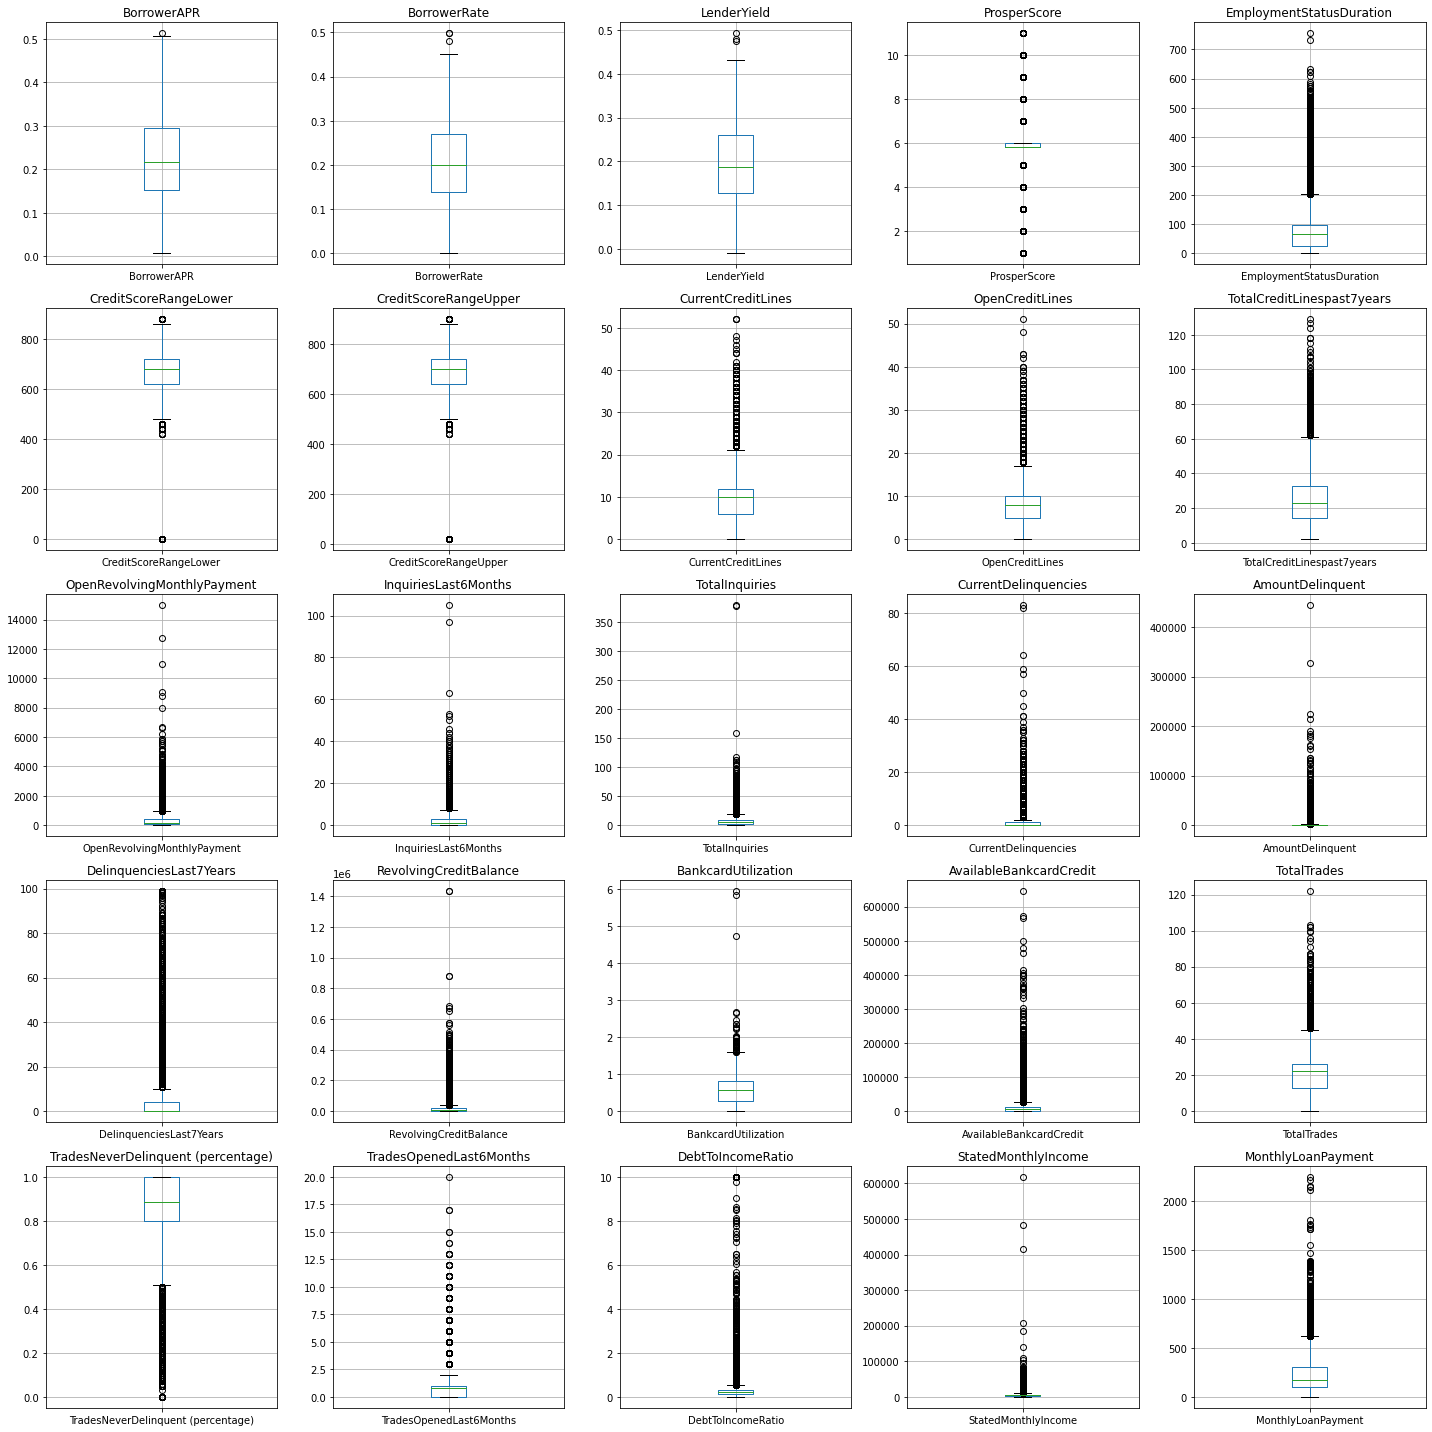

In [34]:
import math

col = df.select_dtypes(include=('float')).columns
num_plots = len(col)
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

for i, column in enumerate(col):
    row = i // num_cols
    col = i % num_cols
    df.boxplot(column, ax=axs[row, col])
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()


## IQR -->  Interquartile Range

The IQR is a technique in machine learning used to detection of outliers, it helps to identify values outside of the range in the data. Specifically, any value that is more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) is considered an outlier.

In [35]:
# Removing outliers from dataset by using IQR
print("shape of data set before removing outliers",df.shape)
col = df.col = df.select_dtypes(include=('float')).columns
for i in col :
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  outliers = df[(df[i] < lower_bound)|(df[i] > upper_bound)]
  df = df.drop(outliers.index)
print("shape of data set after removing outliers",df.shape)

shape of data set before removing outliers (42634, 45)


C:\Users\Cristal info\AppData\Local\Temp\ipykernel_3468\2787521588.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  col = df.col = df.select_dtypes(include=('float')).columns


shape of data set after removing outliers (9186, 45)


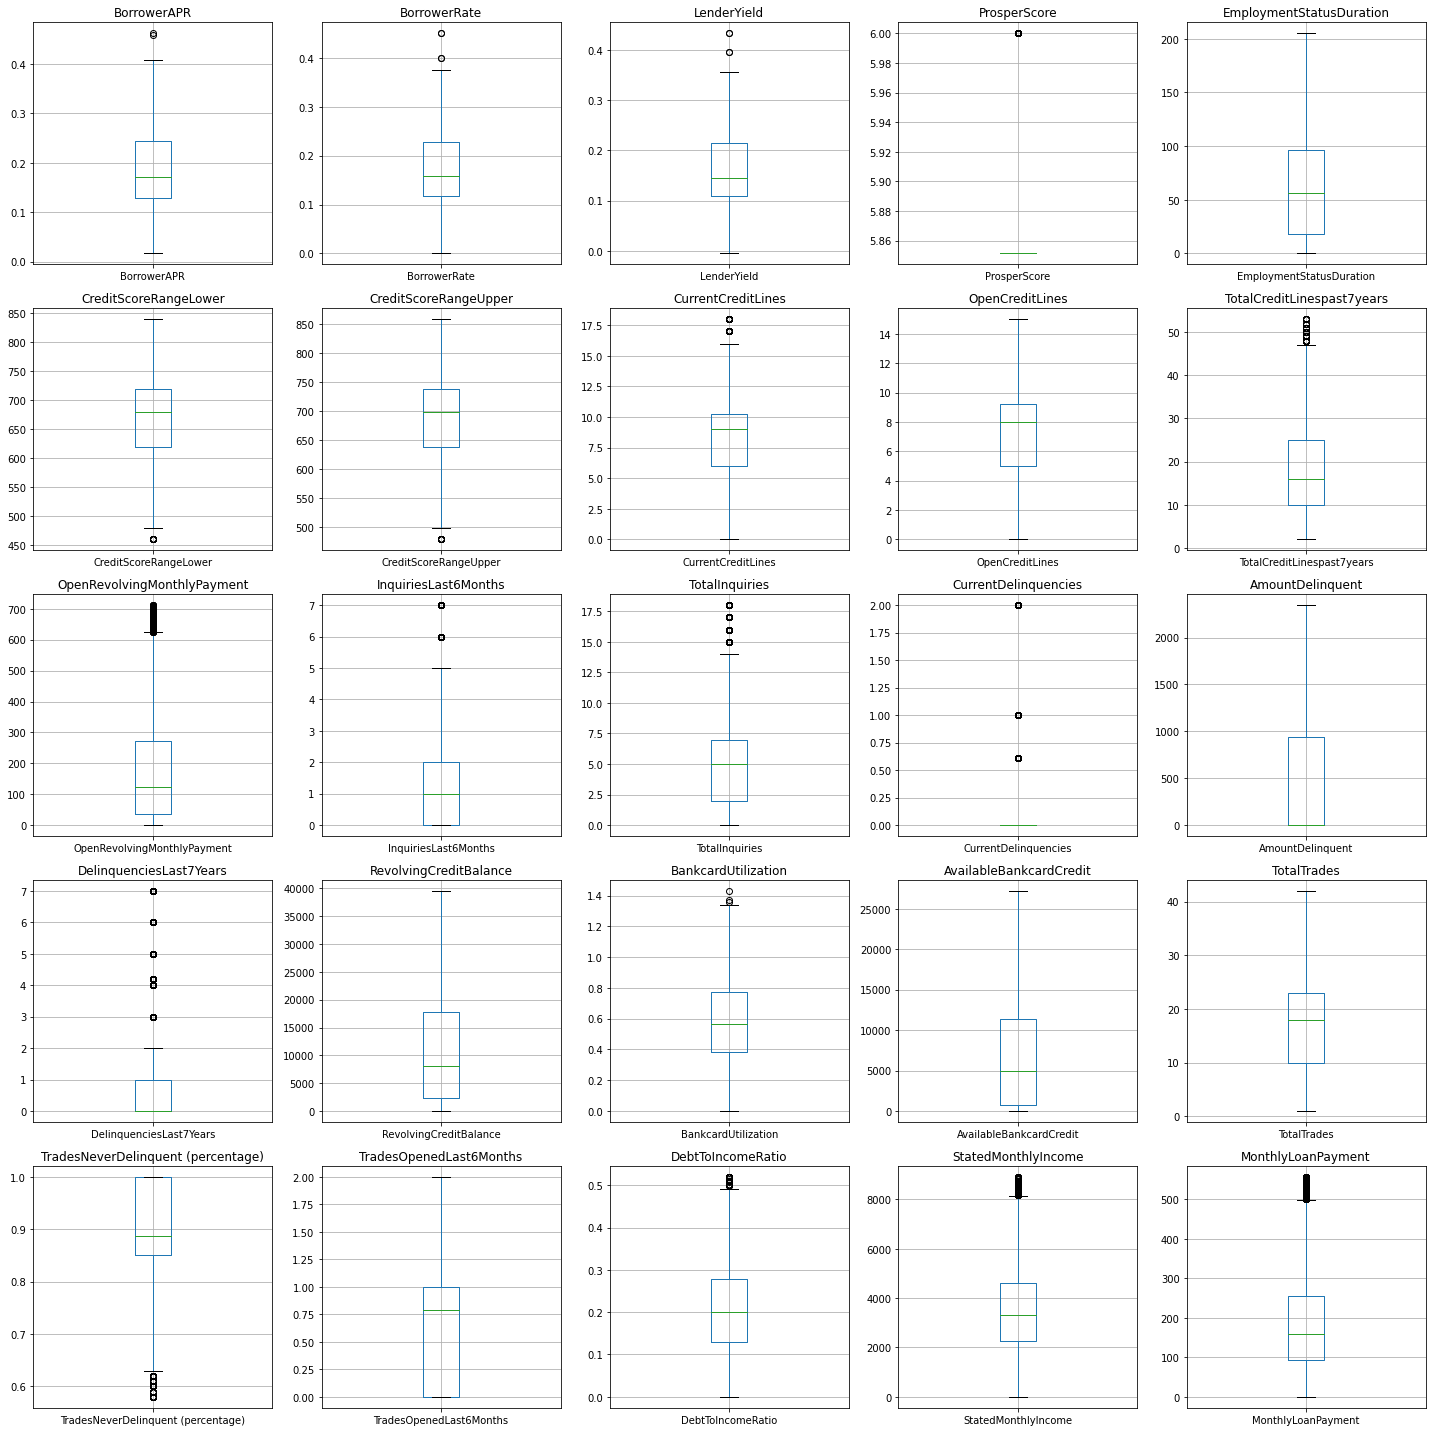

In [36]:
import math

col = df.select_dtypes(include=('float')).columns
num_plots = len(col)
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

for i, column in enumerate(col):
    row = i // num_cols
    col = i % num_cols
    df.boxplot(column, ax=axs[row, col])
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()


In [31]:
df['IncomeRange'].replace(to_replace="Not employed", value="$0", inplace=True)
df['IncomeRange'].replace(to_replace="Not displayed", value="$0", inplace=True)

In [32]:
df['IncomeRange'].value_counts()

$25,000-49,999    3154
$0                2775
$50,000-74,999    1589
$1-24,999         1089
$75,000-99,999     499
$100,000+           80
Name: IncomeRange, dtype: int64

# Data Visualization

Encoding labels for object columns in the data

In [37]:
le=LabelEncoder()
c=df.select_dtypes(include=('object')).columns
for i in c :
  df[i]=le.fit_transform(df[i])
     

Encoding labels task is realized to visualize object columns.

In [38]:
# No, any object column
df.dtypes

ListingCreationDate                     int32
CreditGrade                             int32
Term                                    int64
LoanStatus                              int64
BorrowerAPR                           float64
BorrowerRate                          float64
LenderYield                           float64
ProsperScore                          float64
ListingCategory (numeric)               int64
BorrowerState                           int32
Occupation                              int32
EmploymentStatus                        int32
EmploymentStatusDuration              float64
IsBorrowerHomeowner                      bool
CurrentlyInGroup                         bool
DateCreditPulled                        int32
CreditScoreRangeLower                 float64
CreditScoreRangeUpper                 float64
FirstRecordedCreditLine                 int32
CurrentCreditLines                    float64
OpenCreditLines                       float64
TotalCreditLinespast7years        

In [39]:
df

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,3838,3,36,0,0.16516,0.1580,0.1380,5.851261,0,5,...,0.17,3,True,3083.333333,78,9425,412,17,330.43,258
2,2142,6,36,0,0.28269,0.2750,0.2400,5.851261,0,10,...,0.06,6,True,2083.333333,86,3001,247,1,123.32,41
17,1126,1,36,1,0.13202,0.1250,0.1175,5.851261,0,4,...,0.12,6,True,5833.333333,91,10000,147,16,334.54,85
59,3985,3,36,0,0.16717,0.1600,0.1500,5.851261,0,14,...,0.37,3,True,2750.000000,78,7000,422,17,244.47,193
72,8250,3,36,0,0.29510,0.2599,0.2499,6.000000,7,9,...,0.10,2,True,8333.333333,34,4500,940,13,181.28,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113852,4482,1,36,0,0.11345,0.1065,0.1065,5.851261,0,24,...,0.12,1,True,1958.333333,75,6500,475,26,211.73,168
113880,3396,3,36,0,0.15462,0.1475,0.1275,5.851261,0,10,...,0.33,3,True,3000.000000,80,4800,365,17,165.81,134
113890,3696,3,36,0,0.15462,0.1475,0.1375,5.851261,0,10,...,0.16,3,True,3333.333333,79,10000,392,17,345.43,281
113891,2854,5,36,0,0.19543,0.1808,0.1708,5.851261,0,4,...,0.04,3,True,3250.000000,83,3000,312,9,105.90,133


In [40]:
import warnings
warnings.filterwarnings('ignore')

## Histogram

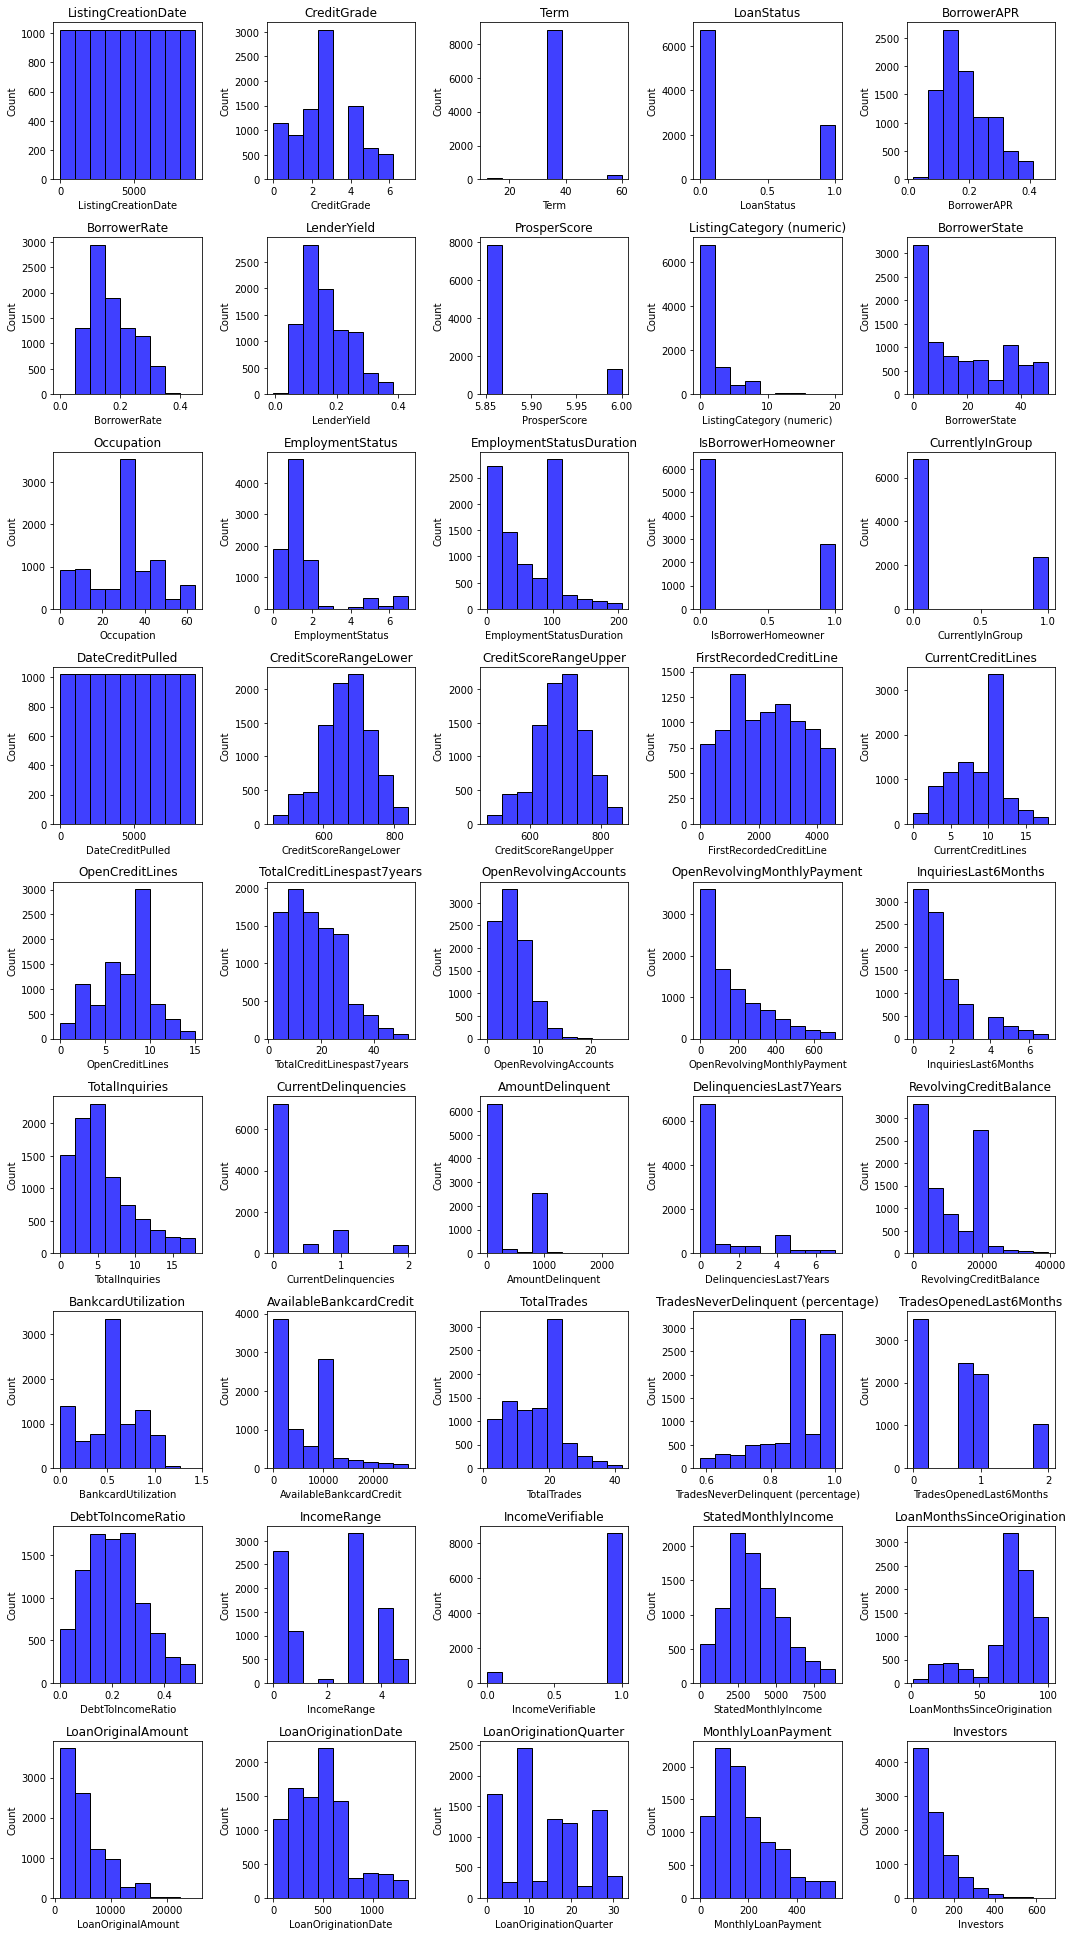

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

col = df.columns
num_cols = len(col)
num_rows = int(num_cols/5) + int(num_cols%5 != 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(15, num_rows*3))

for i, col_name in enumerate(col):
    row_idx = int(i/5)
    col_idx = i%5
    sns.histplot(df[col_name], ax=axes[row_idx, col_idx], kde=False, bins=9, color='blue', edgecolor='black')
    axes[row_idx, col_idx].set_title(col_name)

plt.tight_layout()
plt.show()

## Heatmap

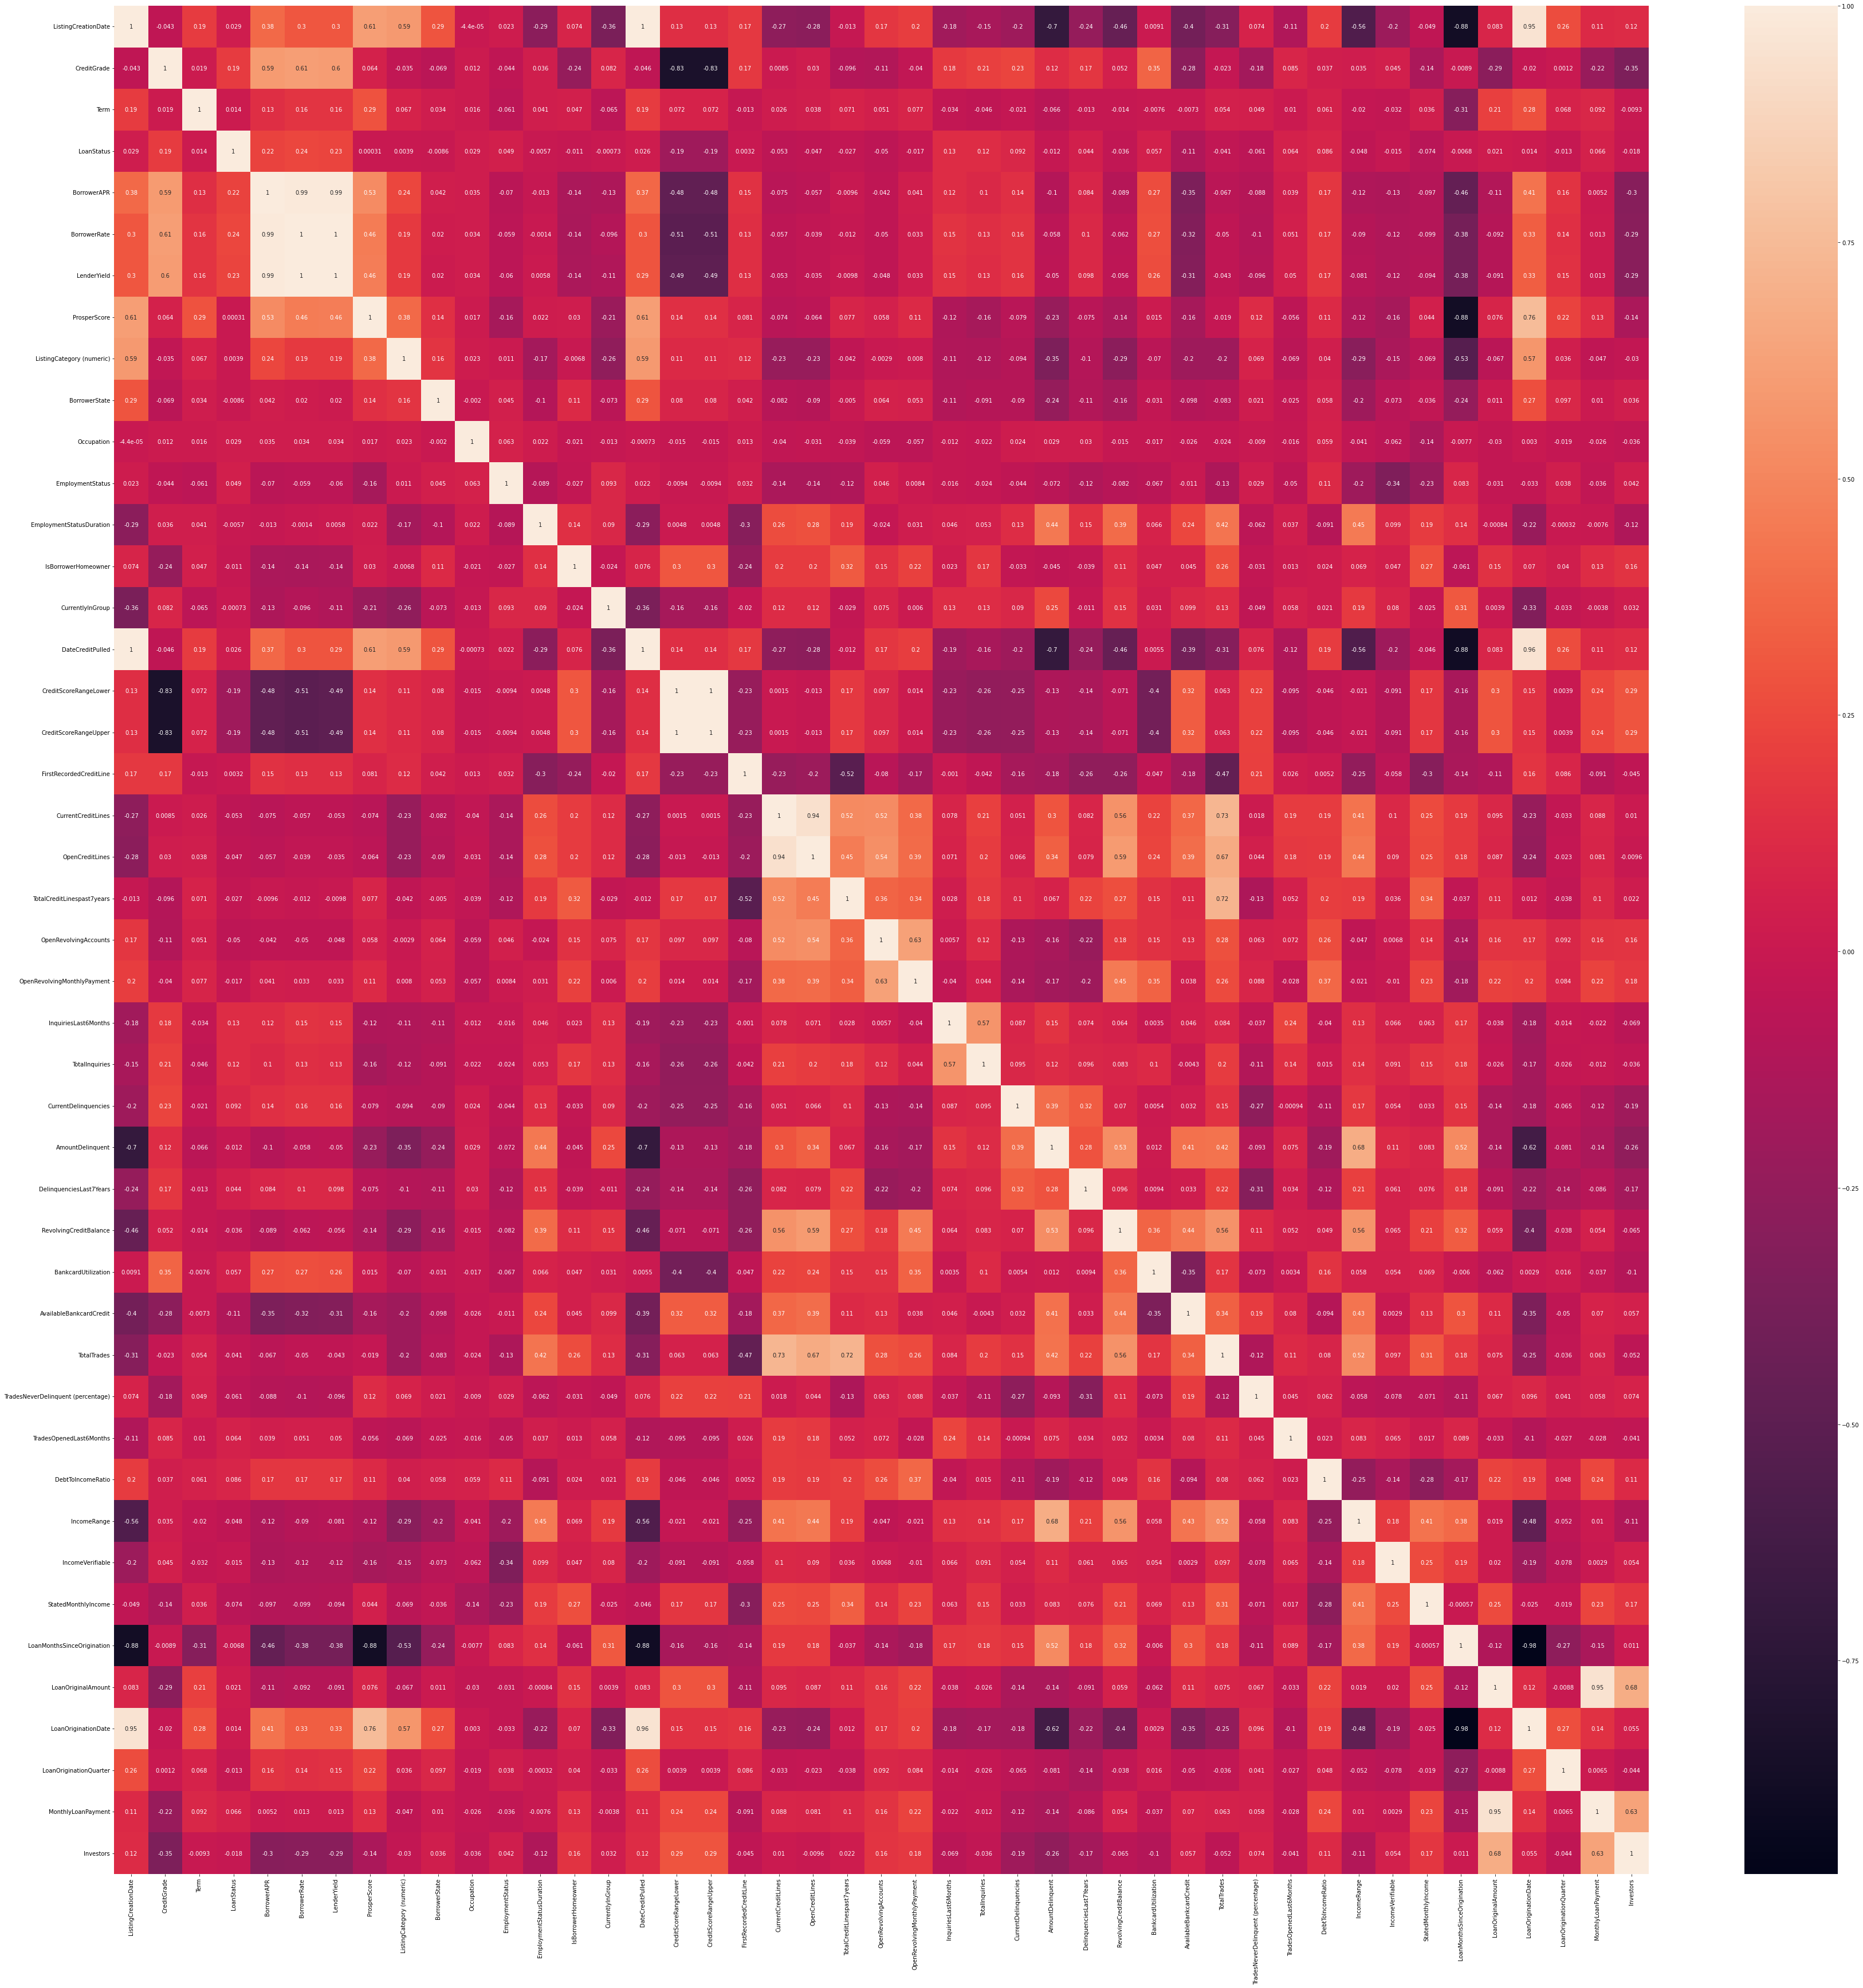

In [41]:
# Heatmap of correlation matrix
plt.figure(figsize=(60,60)) 
sns.heatmap(df.corr(),annot = True)
plt.show()

## Research Questions

**Action:** presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.
* **Prosper** is a** peer-to-peer (P2P)** lending platform that connects **borrowers** with **investors**. 
* **BorrowerRate** refers to the interest rate that a **borrower pays on a loan** obtained through a **lending platform**.
* **Creditworthiness** refers to a borrower's ability to **repay** a **loan** or fulfill their financial obligations, based **on their past and present financial behavior and circumstances. **
* **CreditGrade** is a **rating system** used by **Peer-to-Peer (P2P) lending** platforms such as **Prosper and LendingClub** to evaluate the **creditworthiness** of potential borrowers.
* **Lender Yield** is a measure of the total return that a **lender can expect to receive from investing in a Peer-to-Peer (P2P) lending platfor**m, after taking into account various factors such as the interest rate on the loan, any fees charged by the platform, and the risk of default by the borrower
* A **lender (prêteur)** is an individual or entity **that provides funds to a borrower** with the expectation of receiving repayment of the loan amount plus interest. 

Research Question 1 : What are the most number of borrowers Credit Grade?

In [38]:
df['CreditGrade'].value_counts()

3    3041
4    1485
2    1438
0    1143
1     906
5     641
6     523
7       9
Name: CreditGrade, dtype: int64

<AxesSubplot:xlabel='CreditGrade', ylabel='count'>

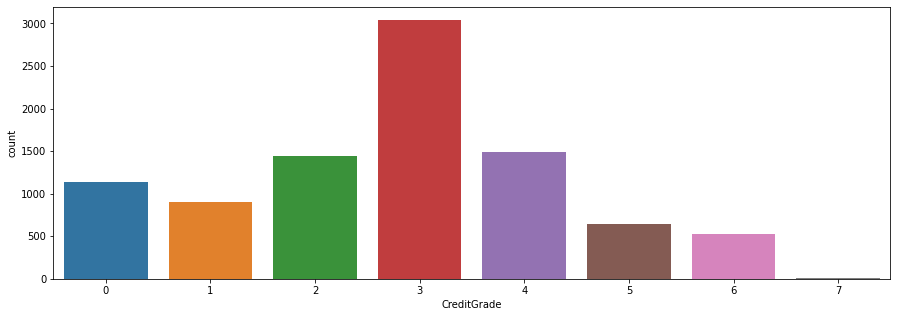

In [42]:
# Check the univariate relationship of Credit Grade# Check the univariate relationship of Credit Grade
plt.figure(figsize=(15,5))
sns.countplot(x='CreditGrade', data=df)

Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

In [40]:
# Check the univariate relationship of Loan Status
plt.figure(figsize=(15,5))
freq_table = df["LoanStatus"].value_counts()
print(freq_table)

0    6722
1    2464
Name: LoanStatus, dtype: int64


<Figure size 1080x360 with 0 Axes>

Research Question 3 : What is the highest number of BorrowerRate?

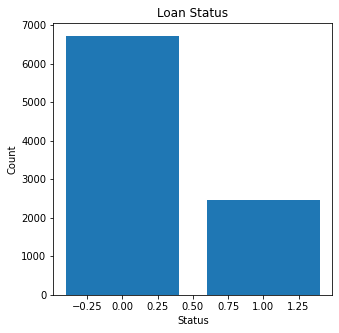

In [41]:
# Create a bar chart of Loan Status
plt.figure(figsize=(5,5))
plt.bar(freq_table.index, freq_table.values)
plt.title("Loan Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='BorrowerRate'>

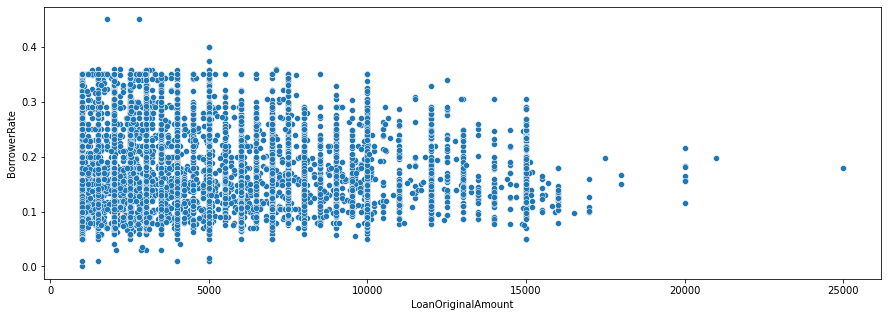

In [42]:
# Visualize the relationship between borrower rate and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerRate')

Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

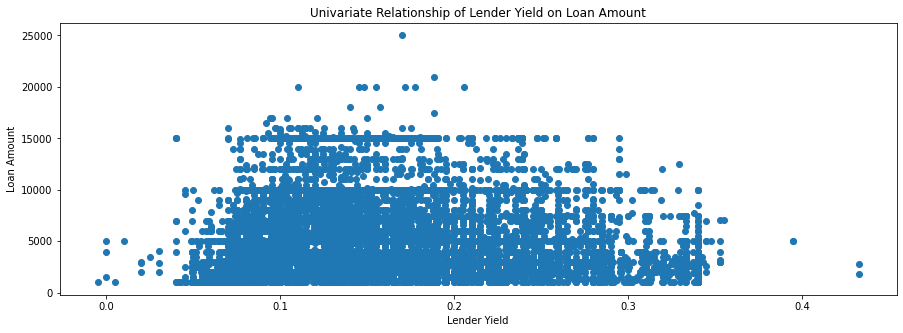

In [43]:
# Create a scatter plot of Lender Yield vs Loan Amount
plt.figure(figsize=(15,5))
plt.scatter(df['LenderYield'], df['LoanOriginalAmount'])
plt.xlabel('Lender Yield')
plt.ylabel('Loan Amount')
plt.title('Univariate Relationship of Lender Yield on Loan Amount')
plt.show()

Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

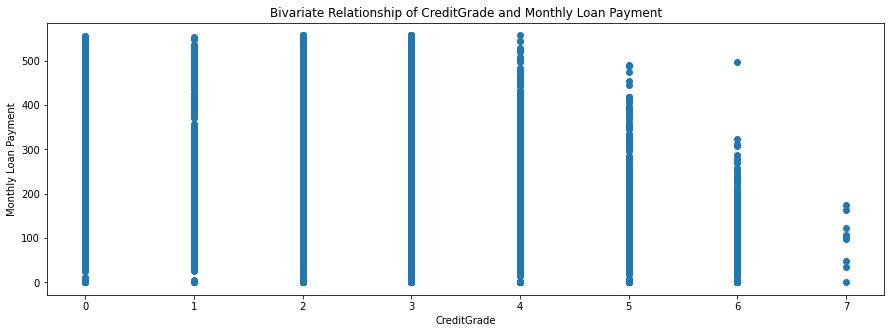

In [43]:
# Create a scatter plot of CreditGrade vs MonthlyLoanPayment
plt.figure(figsize=(15,5))
plt.scatter(df['CreditGrade'],df['MonthlyLoanPayment'])
plt.xlabel('CreditGrade')
plt.ylabel('Monthly Loan Payment')
plt.title('Bivariate Relationship of CreditGrade and Monthly Loan Payment')
plt.show()

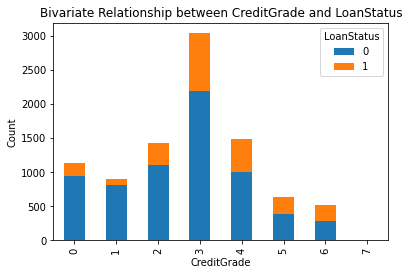

In [44]:
# Create a contingency table of CreditGrade vs LoanStatus
ctable = pd.crosstab(df['CreditGrade'], df['LoanStatus'])
# Create a stacked bar chart of CreditGrade vs LoanStatus
ctable.plot(kind='bar', stacked=True)
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('Bivariate Relationship between CreditGrade and LoanStatus')
plt.show()

Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

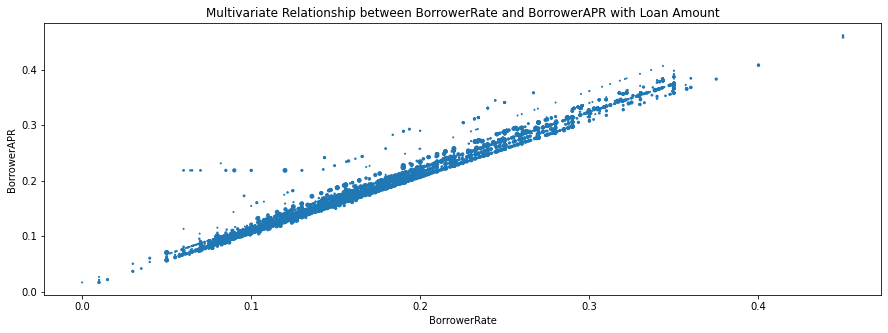

In [45]:
# Create a scatter plot of BorrowerRate vs BorrowerAPR with LoanOriginalAmount represented by marker size
plt.figure(figsize=(15,5))
plt.scatter(df['BorrowerRate'], df['BorrowerAPR'], s=df['LoanOriginalAmount']/1000)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.title('Multivariate Relationship between BorrowerRate and BorrowerAPR with Loan Amount')
plt.show()

In [46]:
df

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,3838,3,36,0,0.16516,0.1580,0.1380,5.851261,0,5,...,0.17,3,True,3083.333333,78,9425,412,17,330.43,258
2,2142,6,36,0,0.28269,0.2750,0.2400,5.851261,0,10,...,0.06,6,True,2083.333333,86,3001,247,1,123.32,41
17,1126,1,36,1,0.13202,0.1250,0.1175,5.851261,0,4,...,0.12,6,True,5833.333333,91,10000,147,16,334.54,85
59,3985,3,36,0,0.16717,0.1600,0.1500,5.851261,0,14,...,0.37,3,True,2750.000000,78,7000,422,17,244.47,193
72,8250,3,36,0,0.29510,0.2599,0.2499,6.000000,7,9,...,0.10,2,True,8333.333333,34,4500,940,13,181.28,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113852,4482,1,36,0,0.11345,0.1065,0.1065,5.851261,0,24,...,0.12,1,True,1958.333333,75,6500,475,26,211.73,168
113880,3396,3,36,0,0.15462,0.1475,0.1275,5.851261,0,10,...,0.33,3,True,3000.000000,80,4800,365,17,165.81,134
113890,3696,3,36,0,0.15462,0.1475,0.1375,5.851261,0,10,...,0.16,3,True,3333.333333,79,10000,392,17,345.43,281
113891,2854,5,36,0,0.19543,0.1808,0.1708,5.851261,0,4,...,0.04,3,True,3250.000000,83,3000,312,9,105.90,133


Normalize data

In [52]:
from sklearn.preprocessing import MinMaxScaler
y_target = df['LoanStatus']
# X is your feature matrix and y is your target variable
X_without_target = df.drop(columns=['LoanStatus'])
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_without_target)
print(X_normalized.shape)

(9186, 44)


In [56]:
type(X_normalized)

numpy.ndarray

In [55]:
type(y_target)

pandas.core.series.Series

# Mutual information 
- is a measure of the dependence between two random variables. In the context of feature selection for a machine learning model, we can use mutual information to identify which features have the most information about the target variable and remove features that have low mutual information.

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif


# Split the data into features (X) and target (y)
X = df.drop(columns=['LoanStatus'])
y = df['LoanStatus']

# Normalize the feature matrix using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Calculate the mutual information scores using the normalized feature matrix and the target variable
mi_scores = mutual_info_classif(X_normalized, y)

# Create a pandas DataFrame with the mutual information scores
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})

# Sort the DataFrame by mutual information score in descending order
mi_df_sorted = mi_df.sort_values(by='mi_score', ascending=False)



# Print the sorted DataFrame
print(mi_df_sorted)


                               feature  mi_score
3                          BorrowerAPR  0.049434
5                          LenderYield  0.043337
4                         BorrowerRate  0.038477
42                  MonthlyLoanPayment  0.027168
16               CreditScoreRangeUpper  0.026848
1                          CreditGrade  0.021528
9                           Occupation  0.021253
15               CreditScoreRangeLower  0.019012
23                InquiriesLast6Months  0.015301
8                        BorrowerState  0.012943
30             AvailableBankcardCredit  0.011498
25                CurrentDelinquencies  0.009314
29                 BankcardUtilization  0.008226
27             DelinquenciesLast7Years  0.007119
10                    EmploymentStatus  0.006616
33             TradesOpenedLast6Months  0.006343
19                     OpenCreditLines  0.006187
37                 StatedMonthlyIncome  0.006037
6                         ProsperScore  0.005739
17             First

In [69]:
mi_df_sorted.columns

Index(['feature', 'mi_score'], dtype='object')

In [73]:
# Select the features with the highest mutual information scores and create a new feature matrix
threshold = 0.003116  # example threshold value
selected_features = list(mi_df_sorted[mi_df_sorted['mi_score'] > threshold]['feature'])
selected_features

['BorrowerAPR',
 'LenderYield',
 'BorrowerRate',
 'MonthlyLoanPayment',
 'CreditScoreRangeUpper',
 'CreditGrade',
 'Occupation',
 'CreditScoreRangeLower',
 'InquiriesLast6Months',
 'BorrowerState',
 'AvailableBankcardCredit',
 'CurrentDelinquencies',
 'BankcardUtilization',
 'DelinquenciesLast7Years',
 'EmploymentStatus',
 'TradesOpenedLast6Months',
 'OpenCreditLines',
 'StatedMonthlyIncome',
 'ProsperScore',
 'FirstRecordedCreditLine',
 'DebtToIncomeRatio',
 'LoanOriginationQuarter',
 'TotalInquiries']

In [ ]:
selected_features

In [80]:

new_df = df.loc[:, selected_features]
new_df.dtypes

BorrowerAPR                float64
LenderYield                float64
BorrowerRate               float64
MonthlyLoanPayment         float64
CreditScoreRangeUpper      float64
CreditGrade                  int32
Occupation                   int32
CreditScoreRangeLower      float64
InquiriesLast6Months       float64
BorrowerState                int32
AvailableBankcardCredit    float64
CurrentDelinquencies       float64
BankcardUtilization        float64
DelinquenciesLast7Years    float64
EmploymentStatus             int32
TradesOpenedLast6Months    float64
OpenCreditLines            float64
StatedMonthlyIncome        float64
ProsperScore               float64
FirstRecordedCreditLine      int32
DebtToIncomeRatio          float64
LoanOriginationQuarter       int32
TotalInquiries             float64
dtype: object

In [76]:
new_df

,BorrowerAPR,LenderYield,BorrowerRate,MonthlyLoanPayment,CreditScoreRangeUpper,CreditGrade,Occupation,CreditScoreRangeLower,InquiriesLast6Months,BorrowerState,...,DelinquenciesLast7Years,EmploymentStatus,TradesOpenedLast6Months,OpenCreditLines,StatedMonthlyIncome,ProsperScore,FirstRecordedCreditLine,DebtToIncomeRatio,LoanOriginationQuarter,TotalInquiries
0,0.16516,0.1380,0.1580,330.43,659.0,3,33,640.0,3.0,5,...,4.0,7,0.000000,4.000000,3083.333333,5.851261,3209,0.17,17,3.0
2,0.28269,0.2400,0.2750,123.32,499.0,6,33,480.0,0.0,10,...,0.0,2,0.792111,9.243278,2083.333333,5.851261,3415,0.06,1,1.0
17,0.13202,0.1175,0.1250,334.54,779.0,1,39,760.0,7.0,4,...,0.0,2,0.792111,9.243278,5833.333333,5.851261,769,0.12,16,17.0
59,0.16717,0.1500,0.1600,244.47,659.0,3,33,640.0,2.0,14,...,2.0,1,1.000000,7.000000,2750.000000,5.851261,2484,0.37,17,2.0
72,0.29510,0.2499,0.2599,181.28,679.0,3,33,660.0,2.0,9,...,1.0,0,0.000000,7.000000,8333.333333,6.000000,2587,0.10,13,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113852,0.11345,0.1065,0.1065,211.73,799.0,1,10,780.0,1.0,24,...,0.0,7,0.000000,4.000000,1958.333333,5.851261,416,0.12,26,2.0
113880,0.15462,0.1275,0.1475,165.81,679.0,3,39,660.0,1.0,10,...,0.0,1,2.000000,9.000000,3000.000000,5.851261,1379,0.33,17,2.0
113890,0.15462,0.1375,0.1475,345.43,679.0,3,12,660.0,1.0,10,...,0.0,1,2.000000,4.000000,3333.333333,5.851261,1924,0.16,17,2.0
113891,0.19543,0.1708,0.1808,105.90,599.0,5,39,580.0,0.0,4,...,0.0,1,1.000000,2.000000,3250.000000,5.851261,4365,0.04,9,8.0


Normalize New_df

In [82]:
scaler = MinMaxScaler()
X_to_pca = scaler.fit_transform(new_df)
print(X_to_pca)

[[0.33368499 0.32685714 0.35111111 ... 0.32692308 0.53125    0.16666667]
 [0.59749501 0.56       0.61111111 ... 0.11538462 0.03125    0.05555556]
 [0.25929833 0.28       0.27777778 ... 0.23076923 0.5        0.94444444]
 ...
 [0.31002671 0.32571429 0.32777778 ... 0.30769231 0.53125    0.11111111]
 [0.40162959 0.40182857 0.40177778 ... 0.07692308 0.28125    0.44444444]
 [0.68858163 0.67314286 0.66555556 ... 0.5        0.0625     0.05555556]]


Apply PCA

In [83]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=10)

# Fit the PCA object to your dataframe
pca.fit(X_to_pca)

# Transform your dataframe into the new feature space
df_after_pca = pca.transform(X_to_pca)


In [85]:
df_after_pca.shape

(9186, 10)

In [87]:
type(df_after_pca)

numpy.ndarray

In [89]:
type(y_target)

pandas.core.series.Series

# Training models

In [ ]:
Y = y_target.values
Y

In [96]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_after_pca, Y, test_size=0.3, random_state=42)


In [101]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_after_pca, Y, test_size=0.3, random_state=42)

# Create XGBoost DMatrix objects from the training and testing sets
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'silent': 1
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing set
y_pred = model.predict(dtest)
y_pred_binary = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Calculate the accuracy score, classification report, and confusion matrix
acc_score = accuracy_score(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
conf_mat = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Accuracy score: {acc_score}")
print(f"Classification report:\n{class_report}")
print(f"Confusion matrix:\n{conf_mat}")


[01:58:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy score: 0.7441944847605225
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      2042
           1       0.53      0.11      0.18       714

    accuracy                           0.74      2756
   macro avg       0.64      0.54      0.51      2756
weighted avg       0.70      0.74      0.67      2756

Confusion matrix:
[[1975   67]
 [ 638   76]]


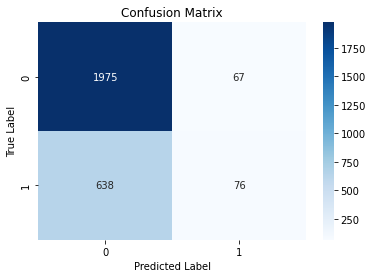

In [104]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()